In [701]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as ss
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings as warn
warn.filterwarnings('ignore')

In [702]:
#Importing the data
bikes_df = pd.read_csv("day.csv")
bikes_df.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [703]:
bikes_df.shape

(730, 16)

In [704]:
# Checking for Null values
bikes_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [705]:
# Information on dataset
bikes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [706]:
bikes_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [707]:
# Since we have gone through the data defination, we could replace some of the values to its categorical values like season, weather
# Before doing that lets drop unnecessary variables
# Instant - more like record id, wont help to predict
# dteday - we already have yr and month.
# Casual & registered - we are droppong this as we are predicting the cnt which is summation of both these two so keeping them
# in dataset would give us wrong prediction might increase the value of Adjusted R^2/ R^2.

bikes_data = bikes_df.drop(["dteday", "instant", "casual", "registered"], axis = 1)

In [708]:
bikes_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [709]:
# Converting the variables into categorical variables
bikes_data.season = bikes_data.season.astype('category')
bikes_data.weathersit = bikes_data.weathersit.astype('category')
bikes_data.mnth = bikes_data.mnth.astype('category')

In [710]:
bikes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    int64   
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(3), float64(4), int64(5)
memory usage: 54.3 KB


In [711]:
# Before replacing the values of Season and weatherSit variable - the count
print(bikes_data.season.value_counts())
print(bikes_data.weathersit.value_counts())

3    188
2    184
1    180
4    178
Name: season, dtype: int64
1    463
2    246
3     21
Name: weathersit, dtype: int64


In [712]:
# Replacing the values for some categorical variables
# weather situation categorical variable
weathers_cat = {1 : "Partly Cloud", 2 : "Mist + Cloudy",3 : "Light Snow", 4 : "Heavy Rain"}
bikes_data.weathersit = bikes_data.weathersit.apply(lambda x : weathers_cat.get(x) if x in weathers_cat else x)

# season categorical variable
season_cat = {1 : "Spring", 2 : "Summer", 3 : "Fall", 4 : "Winter"}
bikes_data.season = bikes_data.season.apply(lambda x : season_cat.get(x) if x in season_cat else x)

In [713]:
# After replacing the values of Season and weatherSit variable - the count
print(bikes_data.season.value_counts())
print(bikes_data.weathersit.value_counts())

Fall      188
Summer    184
Spring    180
Winter    178
Name: season, dtype: int64
Partly Cloud     463
Mist + Cloudy    246
Light Snow        21
Name: weathersit, dtype: int64


In [714]:
mnth_cat = {1 : "Jan", 2 : "Feb", 3 : "Mar", 4 : "Apr", 5 : "May", 6 : "Jun", 7 : "Jul", 8 : "Aug", 9 : "Sep", 10 : "Oct", 11 : "Nov", 12 : "Dec"}
bikes_data.mnth = bikes_data.mnth.apply(lambda x : mnth_cat.get(x) if x in mnth_cat else x)

#yr_cat = {0 : 2018, 1 : 2019}
#bikes_data.yr = bikes_data.yr.apply(lambda x : yr_cat.get(x) if x in yr_cat else x)

In [715]:
bikes_data.mnth.value_counts()

Jan    62
Mar    62
May    62
Jul    62
Aug    62
Oct    62
Dec    62
Apr    60
Jun    60
Sep    60
Nov    60
Feb    56
Name: mnth, dtype: int64

## Visualize the Data

In [716]:
bikes_data.head(2)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,6,0,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,0,0,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,801


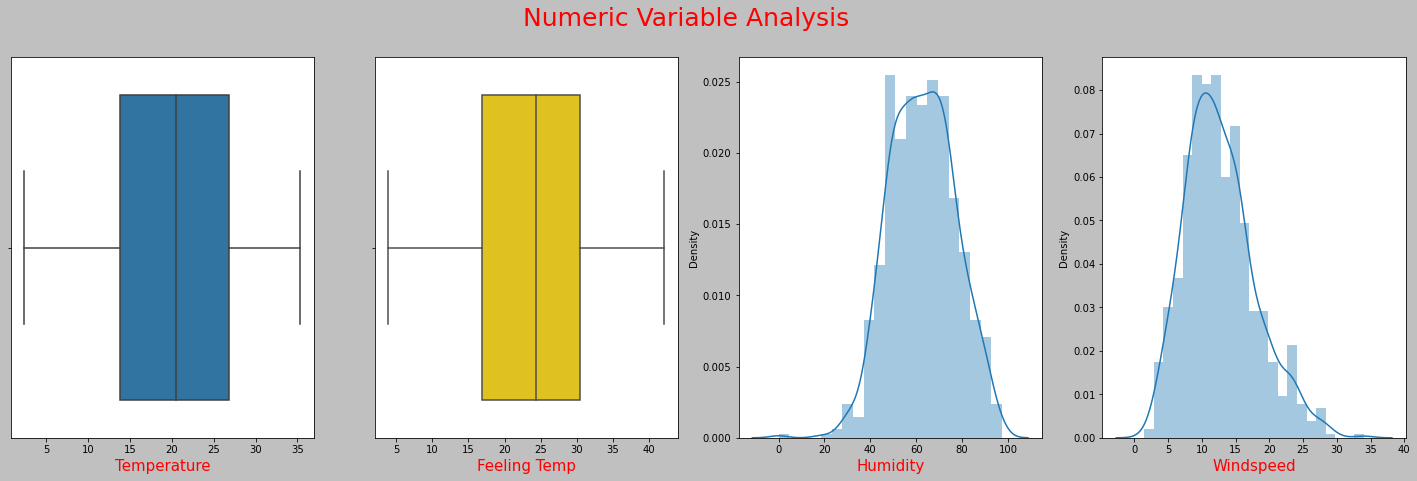

In [717]:
# Univariate Analysis - temp, atemp, humidity, Windspeed
plt.figure(figsize=(25,7), facecolor='silver')
plt.suptitle("Numeric Variable Analysis", fontsize=25, color='r',fontweight=20)


plt.subplot(1,4,1)
ss.boxplot(data = bikes_data, x = bikes_data.temp)
plt.xlabel("Temperature",color='r', fontsize=15)

plt.subplot(1,4,2)
ss.boxplot(data = bikes_data, x = bikes_data.atemp, color='gold')
plt.xlabel("Feeling Temp",color='r', fontsize=15)

plt.subplot(1,4,3)
ss.distplot(x = bikes_data.hum)
plt.xlabel("Humidity",color='r', fontsize=15)

plt.subplot(1,4,4)
ss.distplot(x = bikes_data.windspeed)
plt.xlabel("Windspeed",color='r', fontsize=15)

plt.show()

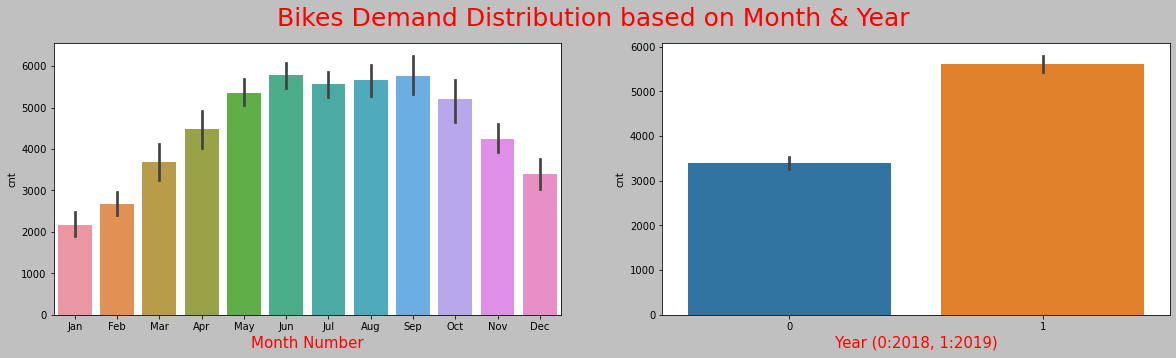

In [719]:
# Bivariate Analysis - Month and Year with count of bikes
plt.figure(figsize=(20,5), facecolor='silver')
plt.suptitle("Bikes Demand Distribution based on Month & Year", fontsize=25, color='r',fontweight=20)


plt.subplot(1,2,1)
ss.barplot(data = bikes_data, x = bikes_data.mnth, y = bikes_data.cnt)
plt.xlabel("Month Number",color='r', fontsize=15)

plt.subplot(1,2,2)
ss.barplot(data = bikes_data, x = bikes_data.yr, y = bikes_data.cnt)
plt.xlabel("Year (0:2018, 1:2019)", color='r', fontsize=15)

plt.show()

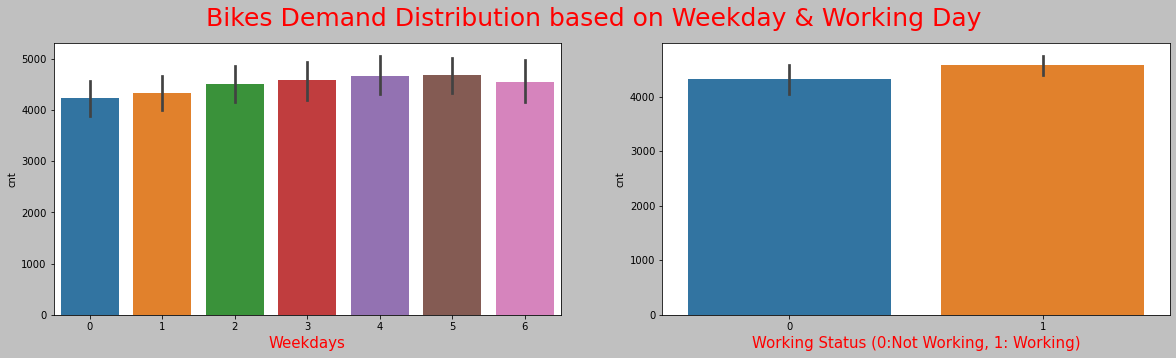

In [721]:
plt.figure(figsize=(20,5), facecolor='silver')
plt.suptitle("Bikes Demand Distribution based on Weekday & Working Day", fontsize=25, color='r',fontweight=20)


plt.subplot(1,2,1)
ss.barplot(data = bikes_data, x = bikes_data.weekday, y = bikes_data.cnt)
plt.xlabel("Weekdays",color='r', fontsize=15)

plt.subplot(1,2,2)
ss.barplot(data = bikes_data, x = bikes_data.workingday, y = bikes_data.cnt)
plt.xlabel("Working Status (0:Not Working, 1: Working)", color='r', fontsize=15)

plt.show()

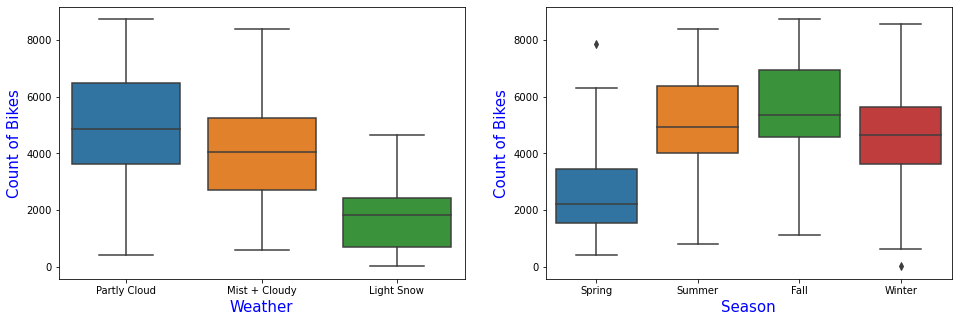

In [723]:
#Categorical variable before data preparation
plt.figure(figsize=(16, 5))

#weathersit
plt.subplot(1,2,1)
ss.boxplot(x = bikes_data.weathersit, y = bikes_data.cnt, data = bikes_data)
plt.xlabel("Weather",color='b', fontsize=15)
plt.ylabel("Count of Bikes",color='b', fontsize=15)

#season
plt.subplot(1,2,2)
ss.boxplot(x = bikes_data.season, y = bikes_data.cnt, data = bikes_data)
plt.xlabel("Season",color='b', fontsize=15)
plt.ylabel("Count of Bikes",color='b', fontsize=15)

plt.show()

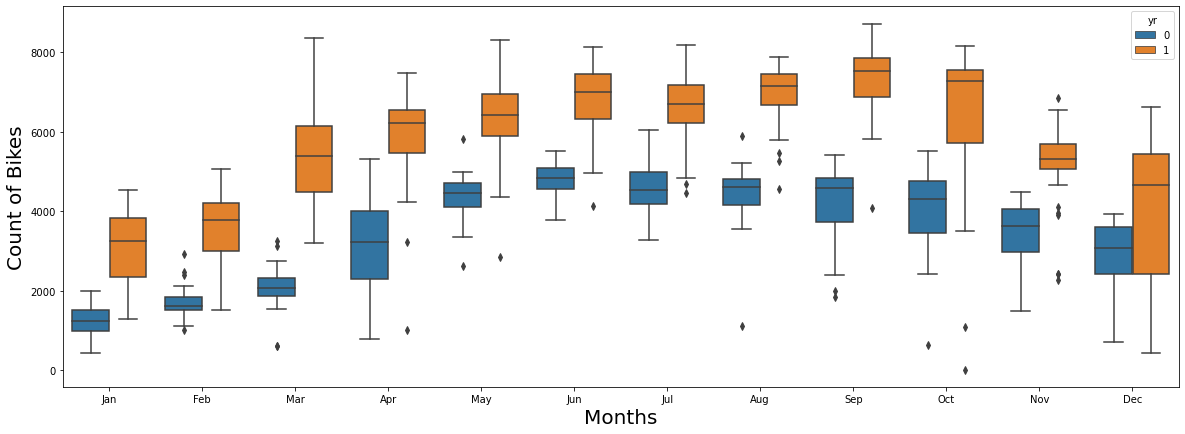

In [724]:
# Multivariate Analysis
plt.figure(figsize=(20,7))
ss.boxplot(data=bikes_data, y = bikes_data.cnt, x = bikes_data.mnth, hue=bikes_data.yr)
plt.xlabel("Months", fontsize=20)
plt.ylabel("Count of Bikes", fontsize=20)
plt.show()

# Below image clearly shows that the month May, Jun, Jul, Aug , Sep has increase in demand for bikes and as year progress
# the demand is getting higher.
# Based on this, if we try creating one hot for this could be helpful for us to check the accuracy. Lets see in future

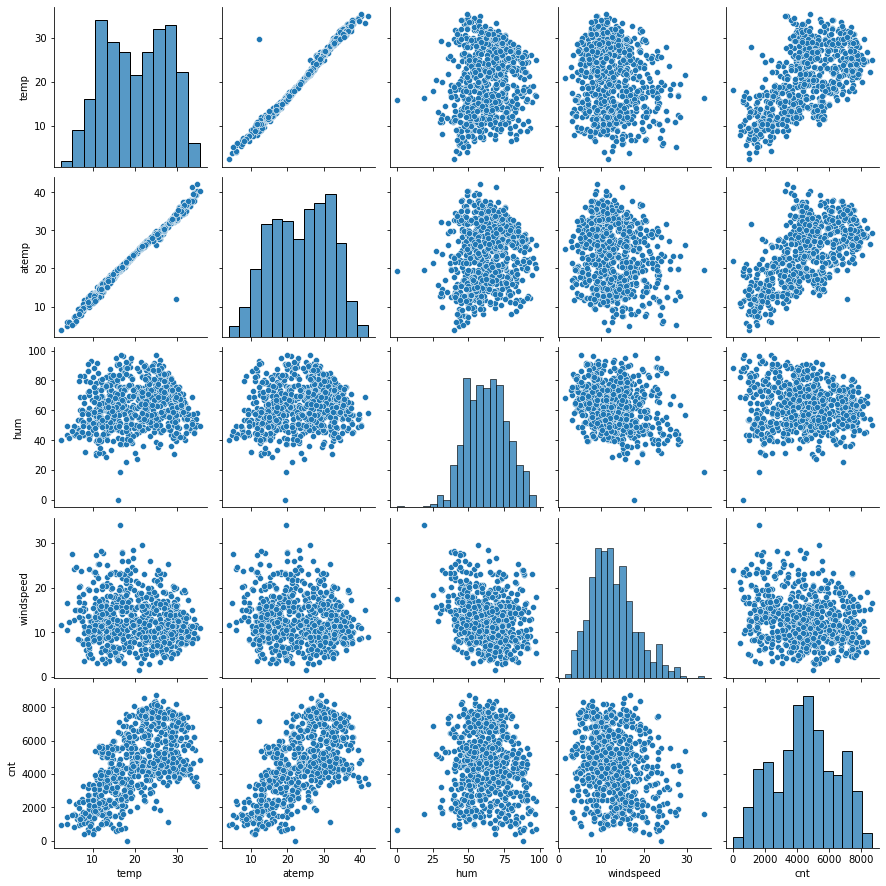

In [725]:
# Multivariate Analysis
ss.pairplot(bikes_data[["temp", "atemp", "hum", "windspeed", "cnt"]])
plt.show()

# After trying for whole dataset, which didnt help with the linear relation, so picked up some of the important variables 
# Clearly saw, there is linear regression between temp, atemp and cnt

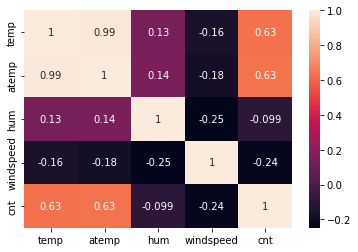

In [727]:
# Checking the correlation between the numeric variables.
numeric_df = bikes_data[["temp", "atemp", "hum", "windspeed", "cnt"]]
ss.heatmap(numeric_df.corr(), annot=True)
plt.show()

# Step 2 : Preparing the data
1. Encoding:-
    - Converting binary vars to 1/0
    - Other categorical vars to dummy vars.
2. Splitting into train and test
3. Rescaling of variables.

**1. Encoding**

In [728]:
# Encoding for Season and Mnth
encoded_df = pd.get_dummies(bikes_data[["mnth", "season"]], drop_first=True)
encoded_df.head()

,mnth_Feb,mnth_Mar,mnth_Apr,mnth_May,mnth_Jun,mnth_Jul,mnth_Aug,mnth_Sep,mnth_Oct,mnth_Nov,mnth_Dec,season_Summer,season_Fall,season_Winter
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [729]:
# Appending the season and mnth encoded dataframe with the original dataframe
bikes_data = pd.concat([bikes_data, encoded_df], axis=1)
bikes_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,mnth_Jun,mnth_Jul,mnth_Aug,mnth_Sep,mnth_Oct,mnth_Nov,mnth_Dec,season_Summer,season_Fall,season_Winter
0,Spring,0,Jan,0,6,0,Mist + Cloudy,14.110847,18.18125,80.5833,...,0,0,0,0,0,0,0,0,0,0
1,Spring,0,Jan,0,0,0,Mist + Cloudy,14.902598,17.68695,69.6087,...,0,0,0,0,0,0,0,0,0,0
2,Spring,0,Jan,0,1,1,Partly Cloud,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,0,0,0
3,Spring,0,Jan,0,2,1,Partly Cloud,8.200000,10.60610,59.0435,...,0,0,0,0,0,0,0,0,0,0
4,Spring,0,Jan,0,3,1,Partly Cloud,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,0,0,0


In [730]:
# Encoding performed for Weathersit variables. 
encoded_df = pd.get_dummies(bikes_data.weathersit, drop_first=True)
encoded_df.head()

,Mist + Cloudy,Light Snow
0,1,0
1,1,0
2,0,0
3,0,0
4,0,0


In [731]:
# Again joining the encoded dataframe with the actual one.
bikes_data = pd.concat([bikes_data, encoded_df], axis=1)
bikes_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,mnth_Aug,mnth_Sep,mnth_Oct,mnth_Nov,mnth_Dec,season_Summer,season_Fall,season_Winter,Mist + Cloudy,Light Snow
0,Spring,0,Jan,0,6,0,Mist + Cloudy,14.110847,18.18125,80.5833,...,0,0,0,0,0,0,0,0,1,0
1,Spring,0,Jan,0,0,0,Mist + Cloudy,14.902598,17.68695,69.6087,...,0,0,0,0,0,0,0,0,1,0
2,Spring,0,Jan,0,1,1,Partly Cloud,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,0,0,0
3,Spring,0,Jan,0,2,1,Partly Cloud,8.200000,10.60610,59.0435,...,0,0,0,0,0,0,0,0,0,0
4,Spring,0,Jan,0,3,1,Partly Cloud,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,0,0,0


In [732]:
# Finally encoding done for weekday, but before doing that lets convert the weekday into Category datatype.
bikes_data.weekday = bikes_data.weekday.astype('category')
# Encoding the variable
encoded_df = pd.get_dummies(bikes_data.weekday, drop_first=True)
encoded_df.head()

,1,2,3,4,5,6
0,0,0,0,0,0,1
1,0,0,0,0,0,0
2,1,0,0,0,0,0
3,0,1,0,0,0,0
4,0,0,1,0,0,0


In [733]:
# Appending the encoding df with actual.
bikes_data = pd.concat([bikes_data, encoded_df], axis=1)
bikes_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,season_Fall,season_Winter,Mist + Cloudy,Light Snow,1,2,3,4,5,6
0,Spring,0,Jan,0,6,0,Mist + Cloudy,14.110847,18.18125,80.5833,...,0,0,1,0,0,0,0,0,0,1
1,Spring,0,Jan,0,0,0,Mist + Cloudy,14.902598,17.68695,69.6087,...,0,0,1,0,0,0,0,0,0,0
2,Spring,0,Jan,0,1,1,Partly Cloud,8.050924,9.47025,43.7273,...,0,0,0,0,1,0,0,0,0,0
3,Spring,0,Jan,0,2,1,Partly Cloud,8.200000,10.60610,59.0435,...,0,0,0,0,0,1,0,0,0,0
4,Spring,0,Jan,0,3,1,Partly Cloud,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,1,0,0,0


In [734]:
# Dropping the variables for which the encodeing has been perfomed
bikes_data.drop(["weekday","season","mnth","weathersit"], axis=1, inplace=True)
#bikes_data.drop(["weekday"], axis=1, inplace=True)

In [735]:
bikes_data.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,mnth_Feb,mnth_Mar,...,season_Fall,season_Winter,Mist + Cloudy,Light Snow,1,2,3,4,5,6
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,0,0,1,0,0,0


**2. Splitting data into Train and Test set**

In [736]:
# Spilliting the data set into train and test data set.
df_train, df_test = train_test_split(bikes_data, train_size=0.7, random_state=100)
print(df_train.shape)
print(df_test.shape)

(510, 30)
(220, 30)


In [737]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,mnth_Feb,mnth_Mar,...,season_Fall,season_Winter,Mist + Cloudy,Light Snow,1,2,3,4,5,6
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,20.108257,23.500287,63.123710,12.834912,4485.337255,0.066667,0.098039,...,0.262745,0.247059,0.345098,0.029412,0.150980,0.131373,0.158824,0.133333,0.127451,0.154902
std,0.500429,0.157763,0.468282,7.431626,8.090963,14.153170,5.292031,1950.666077,0.249689,0.297660,...,0.440557,0.431725,0.475867,0.169124,0.358381,0.338139,0.365870,0.340268,0.333805,0.362166
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,2.834381,22.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.606865,16.603063,52.270825,9.041918,3120.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,20.277923,24.131150,63.437500,12.083182,4530.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,26.615847,30.177700,73.250025,15.750879,5973.500000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.041700,34.000021,8714.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**3. Scaling the variables**

In [738]:
# Instantiate the object
scaler = MinMaxScaler()

# Variables for scaling
list_var = ["temp", "atemp", "hum", "windspeed", "cnt"]

# Fitting the data
df_train[list_var] = scaler.fit_transform(df_train[list_var])


In [739]:
df_train[["temp", "atemp", "hum", "windspeed", "cnt"]].describe()

,temp,atemp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.537440,0.513156,0.650480,0.320883,0.513499
std,0.225858,0.212410,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.332086,0.538643,0.199179,0.356420
50%,0.542596,0.529718,0.653714,0.296763,0.518638
75%,0.735215,0.688457,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000


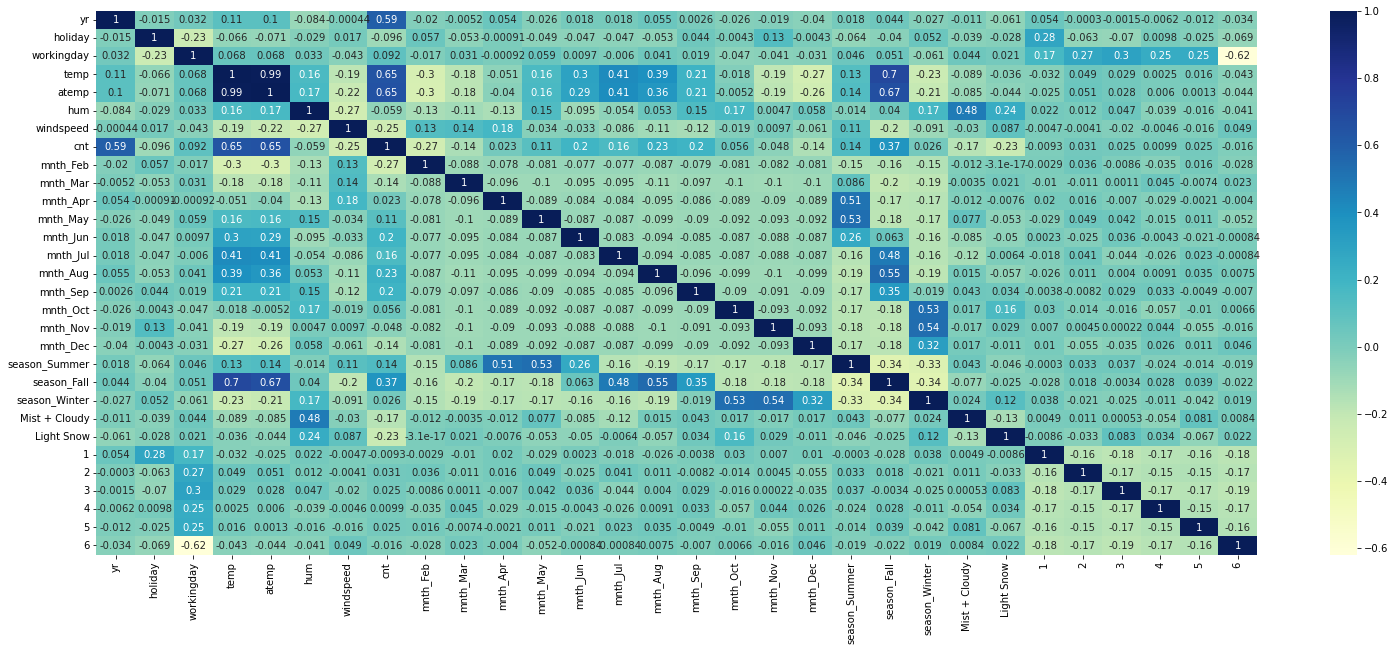

In [740]:
# Heatmap - to check the correlation between all the variables
plt.figure(figsize= (26,10))
ss.heatmap(df_train.corr(), annot = True, cmap = 'YlGnBu')
plt.show()

In [741]:
# Create X and y for the training data set.
y_train = df_train.pop('cnt')
X_train = df_train

In [742]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,mnth_Feb,mnth_Mar,mnth_Apr,...,season_Fall,season_Winter,Mist + Cloudy,Light Snow,1,2,3,4,5,6
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,...,1,0,0,0,0,1,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0,1,0,...,0,0,1,0,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0,0,0,...,0,0,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0,0,1,...,0,0,1,0,0,0,0,0,0,1
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0,0,1,...,0,0,1,0,0,0,0,0,1,0


## Step 3 : Training the model

In [743]:
# Instatiate the object of Linear Regression/
lm = LinearRegression()
# Fitting the model.
lm.fit(X_train, y_train)

rfe = RFE(lm, 20)
rfe = rfe.fit(X_train, y_train)

In [744]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('mnth_Feb', False, 2),
 ('mnth_Mar', True, 1),
 ('mnth_Apr', True, 1),
 ('mnth_May', True, 1),
 ('mnth_Jun', True, 1),
 ('mnth_Jul', False, 3),
 ('mnth_Aug', True, 1),
 ('mnth_Sep', True, 1),
 ('mnth_Oct', True, 1),
 ('mnth_Nov', False, 4),
 ('mnth_Dec', False, 5),
 ('season_Summer', True, 1),
 ('season_Fall', True, 1),
 ('season_Winter', True, 1),
 ('Mist + Cloudy', True, 1),
 ('Light Snow', True, 1),
 (1, False, 6),
 (2, False, 7),
 (3, False, 9),
 (4, False, 10),
 (5, False, 8),
 (6, True, 1)]

In [745]:
col = X_train.columns[rfe.support_]
col

Index([           'yr',       'holiday',    'workingday',          'temp',
               'atemp',           'hum',     'windspeed',      'mnth_Mar',
            'mnth_Apr',      'mnth_May',      'mnth_Jun',      'mnth_Aug',
            'mnth_Sep',      'mnth_Oct', 'season_Summer',   'season_Fall',
       'season_Winter', 'Mist + Cloudy',    'Light Snow',               6],
      dtype='object')

## Building the model

In [746]:
X_train =X_train[col]
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,mnth_Mar,mnth_Apr,mnth_May,mnth_Jun,mnth_Aug,mnth_Sep,mnth_Oct,season_Summer,season_Fall,season_Winter,Mist + Cloudy,Light Snow,6
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,0,0,0,0,0,1,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,1,0,0,0,0,0,0,0,0,0,1,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0,0,0,0,0,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0,1,0,0,0,0,0,1,0,0,1,0,1
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0,1,0,0,0,0,0,1,0,0,1,0,0


In [747]:
# Model 1
X_train_sm = sm.add_constant(X_train)
lr1 = sm.OLS(y_train, X_train_sm)
lr_model1 = lr1.fit()

In [748]:
print(lr_model1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     139.7
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          1.53e-187
Time:                        21:58:35   Log-Likelihood:                 524.48
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     489   BIC:                            -918.0
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1908      0.029      6.552

In [749]:
# vif of model 1
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,411.31
4,atemp,375.93
5,hum,18.24
15,season_Fall,9.10
14,season_Summer,7.47
2,workingday,5.10
6,windspeed,4.33
9,mnth_May,3.74
8,mnth_Apr,3.34
16,season_Winter,3.22


In [750]:
# We could see, atemp predictor has high VIF and also high P value. As per the rule, lets drop that variable and build the model
X_train = X_train.drop("atemp", axis=1)

In [751]:
# Model 2
X_train_sm2 = sm.add_constant(X_train)
lr2 = sm.OLS(y_train, X_train_sm2)
lr_model2 = lr2.fit()
print(lr_model2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     147.3
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          1.29e-188
Time:                        21:58:46   Log-Likelihood:                 524.44
No. Observations:                 510   AIC:                            -1009.
Df Residuals:                     490   BIC:                            -924.2
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1911      0.029      6.575

In [752]:
# vif for model2
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,29.25
4,hum,17.98
14,season_Fall,9.03
13,season_Summer,7.47
2,workingday,5.10
5,windspeed,4.13
8,mnth_May,3.74
7,mnth_Apr,3.33
15,season_Winter,3.22
9,mnth_Jun,2.51


In [753]:
# After dropping the atemp, we could see the VIF is significantly decreased and but not good enough. As we can see there are still
# predictor has high value P value and High Temp. So lets drop the next predictor which has high P value and that is "mnth_Apr"
X_train = X_train.drop('mnth_Apr', axis=1)

In [754]:
# Model 3
X_train_sm3 = sm.add_constant(X_train)
lr3 = sm.OLS(y_train, X_train_sm3)
lr_model3 = lr3.fit()
print(lr_model3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     154.9
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          3.84e-189
Time:                        21:58:57   Log-Likelihood:                 523.05
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     491   BIC:                            -927.7
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1948      0.029      6.713

In [755]:
# VIF of model 3
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,28.98
4,hum,17.95
13,season_Fall,9.02
2,workingday,5.10
5,windspeed,4.05
12,season_Summer,3.81
14,season_Winter,3.17
15,Mist + Cloudy,2.16
0,yr,2.06
7,mnth_May,1.99


In [756]:
# After dropping one of the highly significant predictor, we saw another predictor i.e. "mnth_Jun" increases its P-value.
#Lets drop the same and look at the VIF and next model
X_train = X_train.drop('mnth_Jun', axis=1)

In [757]:
X_train_sm4 = sm.add_constant(X_train)
lr4 = sm.OLS(y_train, X_train_sm4)
lr_model4 = lr4.fit()
print(lr_model4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     163.8
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          5.55e-190
Time:                        21:59:09   Log-Likelihood:                 522.40
No. Observations:                 510   AIC:                            -1009.
Df Residuals:                     492   BIC:                            -932.6
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1944      0.029      6.697

In [758]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,24.83
4,hum,17.58
12,season_Fall,8.80
2,workingday,5.10
5,windspeed,4.00
11,season_Summer,3.75
13,season_Winter,3.12
14,Mist + Cloudy,2.15
0,yr,2.05
16,6,1.92


In [759]:
# Post dropping "mnth_Jun", "mnth_May" reacted the same as previous variable. Since we already have High VIF, so we can drop this
# variable which has high P-value of 0.112
X_train = X_train.drop('mnth_May', axis=1)

In [760]:
# Model 5
X_train_sm5 = sm.add_constant(X_train)
lr5 = sm.OLS(y_train, X_train_sm5)
lr_model5 = lr5.fit()
print(lr_model5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     173.3
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          1.46e-190
Time:                        21:59:16   Log-Likelihood:                 521.09
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     493   BIC:                            -936.2
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1892      0.029      6.549

In [761]:
# VIF of model 5
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,24.20
4,hum,17.51
11,season_Fall,8.53
2,workingday,5.09
5,windspeed,3.94
10,season_Summer,3.54
12,season_Winter,3.06
13,Mist + Cloudy,2.15
0,yr,2.04
15,6,1.92


In [762]:
# Dropping the "season_Fall" since it has high P value.
X_train = X_train.drop('season_Fall', axis=1)

# Model 6
X_train_sm6 = sm.add_constant(X_train)
lr6 = sm.OLS(y_train, X_train_sm6)
lr_model6 = lr6.fit()
print(lr_model6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          4.17e-191
Time:                        21:59:23   Log-Likelihood:                 519.66
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1897      0.029      6.557

In [763]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,16.77
3,temp,10.17
2,workingday,5.09
5,windspeed,3.91
11,season_Winter,2.33
12,Mist + Cloudy,2.14
0,yr,2.03
14,6,1.92
10,season_Summer,1.84
7,mnth_Aug,1.61


In [764]:
#Removing the high significant or p value variable from the train set.
X_train = X_train.drop('mnth_Mar', axis=1)

#Model 7
X_train_sm7 = sm.add_constant(X_train)
lr7 = sm.OLS(y_train, X_train_sm7)
lr_model7 = lr7.fit()
print(lr_model7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.6
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          8.70e-192
Time:                        21:59:29   Log-Likelihood:                 518.52
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     495   BIC:                            -943.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1948      0.029      6.769

In [765]:
# We were able to decrease some multi-collinearity, but the hum has more high VIF so in the next model will drop it. 
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,16.57
3,temp,10.01
2,workingday,5.05
5,windspeed,3.83
10,season_Winter,2.25
11,Mist + Cloudy,2.14
0,yr,2.03
13,6,1.90
9,season_Summer,1.84
8,mnth_Oct,1.61


In [766]:
# Dropping "hum" since it has low P value than assumed significance and High VIF.
X_train = X_train.drop('hum', axis=1)

# Model 8
X_train_sm8 = sm.add_constant(X_train)
lr8 = sm.OLS(y_train, X_train_sm8)
lr_model8 = lr8.fit()
print(lr_model8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     201.8
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          1.97e-188
Time:                        21:59:34   Log-Likelihood:                 507.76
No. Observations:                 510   AIC:                            -987.5
Df Residuals:                     496   BIC:                            -928.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0937      0.019      4.914

In [767]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,6.39
2,workingday,4.40
4,windspeed,3.60
0,yr,2.02
9,season_Winter,2.00
8,season_Summer,1.83
12,6,1.77
7,mnth_Oct,1.60
5,mnth_Aug,1.59
10,Mist + Cloudy,1.55


In [768]:
# Dropping the variable "mnth_Oct" since it has slightly higher p value than threshold of 0.05 plus we have higher multicollineaeirty too
X_train = X_train.drop('mnth_Oct', axis=1)

#Model 9
X_train_sm9 = sm.add_constant(X_train)
lr9 = sm.OLS(y_train, X_train_sm9)
lr_model9 = lr9.fit()
print(lr_model9.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     217.0
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          8.64e-189
Time:                        21:59:38   Log-Likelihood:                 505.81
No. Observations:                 510   AIC:                            -985.6
Df Residuals:                     497   BIC:                            -930.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0903      0.019      4.740

In [769]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,6.20
2,workingday,4.35
4,windspeed,3.60
0,yr,2.02
7,season_Summer,1.82
11,6,1.76
5,mnth_Aug,1.58
9,Mist + Cloudy,1.54
8,season_Winter,1.52
6,mnth_Sep,1.31


In [770]:
# Since the VIF was higher than 5 and need to decrease the multicolinearity, dropping one of the inependent variable will help
# Dropping holiday since of all it has high P val.
X_train = X_train.drop('holiday', axis=1)
# Model 10
X_train_sm10 = sm.add_constant(X_train)
lr10 = sm.OLS(y_train, X_train_sm10)
lr_model10 = lr10.fit()
print(lr_model10.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     234.9
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          4.31e-189
Time:                        21:59:48   Log-Likelihood:                 503.70
No. Observations:                 510   AIC:                            -983.4
Df Residuals:                     498   BIC:                            -932.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0809      0.019      4.365

In [771]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,6.10
1,workingday,4.04
3,windspeed,3.49
0,yr,2.02
6,season_Summer,1.82
10,6,1.69
4,mnth_Aug,1.58
8,Mist + Cloudy,1.54
7,season_Winter,1.51
5,mnth_Sep,1.30


In [772]:
# Dropping "mnth_Aug" to reduce the VIF from the variables.
X_train = X_train.drop('mnth_Aug', axis=1)
# Model 11
X_train_sm11 = sm.add_constant(X_train)
lr11 = sm.OLS(y_train, X_train_sm11)
lr_model11 = lr11.fit()
print(lr_model11.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     253.0
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          3.13e-188
Time:                        21:59:59   Log-Likelihood:                 498.79
No. Observations:                 510   AIC:                            -975.6
Df Residuals:                     499   BIC:                            -929.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0750      0.019      4.031

In [773]:
# VIF of Model 11
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.76
1,workingday,4.04
3,windspeed,3.44
0,yr,2.02
9,6,1.69
5,season_Summer,1.57
7,Mist + Cloudy,1.53
6,season_Winter,1.40
4,mnth_Sep,1.20
8,Light Snow,1.08


## Step 4 : Residual Analysis

In [774]:
y_train_pred = lr_model11.predict(X_train_sm11)

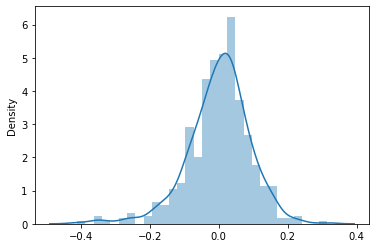

In [775]:
# Residual check.
res = y_train - y_train_pred
ss.distplot(res)
plt.show()

## Prediction and Evaluation

In [776]:
# Variables for scaling for the test data
list_var = ["temp", "atemp", "hum", "windspeed", "cnt"]

# Fitting the data
df_test[list_var] = scaler.transform(df_test[list_var])

In [777]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 184 to 653
Data columns (total 30 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   yr             220 non-null    int64  
 1   holiday        220 non-null    int64  
 2   workingday     220 non-null    int64  
 3   temp           220 non-null    float64
 4   atemp          220 non-null    float64
 5   hum            220 non-null    float64
 6   windspeed      220 non-null    float64
 7   cnt            220 non-null    float64
 8   mnth_Feb       220 non-null    uint8  
 9   mnth_Mar       220 non-null    uint8  
 10  mnth_Apr       220 non-null    uint8  
 11  mnth_May       220 non-null    uint8  
 12  mnth_Jun       220 non-null    uint8  
 13  mnth_Jul       220 non-null    uint8  
 14  mnth_Aug       220 non-null    uint8  
 15  mnth_Sep       220 non-null    uint8  
 16  mnth_Oct       220 non-null    uint8  
 17  mnth_Nov       220 non-null    uint8  
 18  mnth_Dec

In [778]:
# Create X and y test variables
y_test = df_test.pop('cnt')
X_test = df_test

In [779]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 184 to 653
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   yr             220 non-null    int64  
 1   holiday        220 non-null    int64  
 2   workingday     220 non-null    int64  
 3   temp           220 non-null    float64
 4   atemp          220 non-null    float64
 5   hum            220 non-null    float64
 6   windspeed      220 non-null    float64
 7   mnth_Feb       220 non-null    uint8  
 8   mnth_Mar       220 non-null    uint8  
 9   mnth_Apr       220 non-null    uint8  
 10  mnth_May       220 non-null    uint8  
 11  mnth_Jun       220 non-null    uint8  
 12  mnth_Jul       220 non-null    uint8  
 13  mnth_Aug       220 non-null    uint8  
 14  mnth_Sep       220 non-null    uint8  
 15  mnth_Oct       220 non-null    uint8  
 16  mnth_Nov       220 non-null    uint8  
 17  mnth_Dec       220 non-null    uint8  
 18  season_S

In [780]:
# Creating X_test data by taking only final set of column from our final model11
X_train_sm11.drop('const', axis=1, inplace=True)

X_test = X_test[X_train_sm11.columns]
X_test.head()

,yr,workingday,temp,windspeed,mnth_Sep,season_Summer,season_Winter,Mist + Cloudy,Light Snow,6
184,0,0,0.831783,0.084219,0,0,0,1,0,0
535,1,1,0.901354,0.153728,0,1,0,0,0,0
299,0,1,0.511964,0.334206,0,0,1,1,0,0
221,0,1,0.881625,0.339570,0,0,0,0,0,0
152,0,1,0.817246,0.537414,0,1,0,0,0,0


In [781]:
# Adding the constant
X_test_sm = sm.add_constant(X_test)

#Making Prediction
y_pred = lr_model11.predict(X_test_sm)

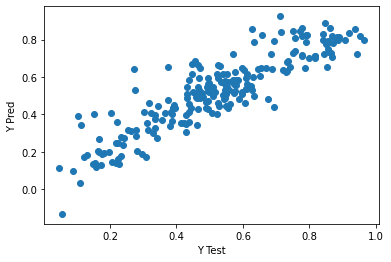

In [782]:
plt.scatter(y_test, y_pred)
plt.xlabel("Y Test")
plt.ylabel("Y Pred")
plt.show()

In [783]:
# R2 Score
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
r2

0.7961390438459764

In [784]:
lr_model11.params

const            0.075009
yr               0.233139
workingday       0.056117
temp             0.549892
windspeed       -0.155203
mnth_Sep         0.097365
season_Summer    0.088621
season_Winter    0.130655
Mist + Cloudy   -0.080022
Light Snow      -0.287090
6                0.067500
dtype: float64

In [ ]:
# Final Inetrepretation would be
cnt = 0.075009 + (temp * 0.549892) + (yr * 0.233139) - (Light Snow * 0.287090) + (workingday * 0.056117) - (windspeed * 0.155203) + (mnth_Sep * 0.097365) + (season_Summer * 0.088621) + (season_Winter * 0.130655) + (6 * 0.067500) - (Mist + Cloudy * 0.080022)cnt = 0.084143 + (yr × 0.230846) + (workingday × 0.043203) + (temp × 0.563615) − (windspeed × 0.155191) + (season2 × 0.082706) + (season4 ×0.128744) + (mnth9 × 0.094743) + (weekday6 ×0.056909) − (weathersit2 × 0.074807) − (weathersit3 × 0.306992)